## Map of ASEAN Countries on Mercator Projection

Author: swatchai kriengkraipet

Summaries:
- This is Jupyter notebook
- Requires: Python 2.7 + matplotlib + cartopy + etc. packages
- Prepared for my github depository: https://github.com/swatchai/cartopy_asean_proj

In [1]:
%matplotlib inline

Advantages for using Mercator:
- shapes of areas are preserved
- good for areas with EW longer than NS and near equator
- easy to plot labels with Cartopy
- Cartopy supports grid ticks of only cylindrical projection (includes this) +
- ref: http://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html

Disadvantages:
- large scale errors
- straight meridians cause wrong sense of round earth
- not best with long NS short EW as the case is

#### Creating a Sub-class of Cartopy's Existing Map Projection

In [2]:
import cartopy   # v 0.14
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# central_longitude = 115E degrees
class asean_mercator(ccrs.Mercator):
    """
    Mercator projection for ASEAN domain.
    Ellipsoid is wgs84 (default)

    """
    def __init__(self):
        globe = ccrs.Globe()  # default globe: wgs1984
        super(asean_mercator, self).__init__(central_longitude=115, globe=globe)

    @property
    def x_limits(self):
        return (-2.9e6, 3.0e6)

    @property
    def y_limits(self):
        return (-1.5e6, 3.7e6)  # values in meters

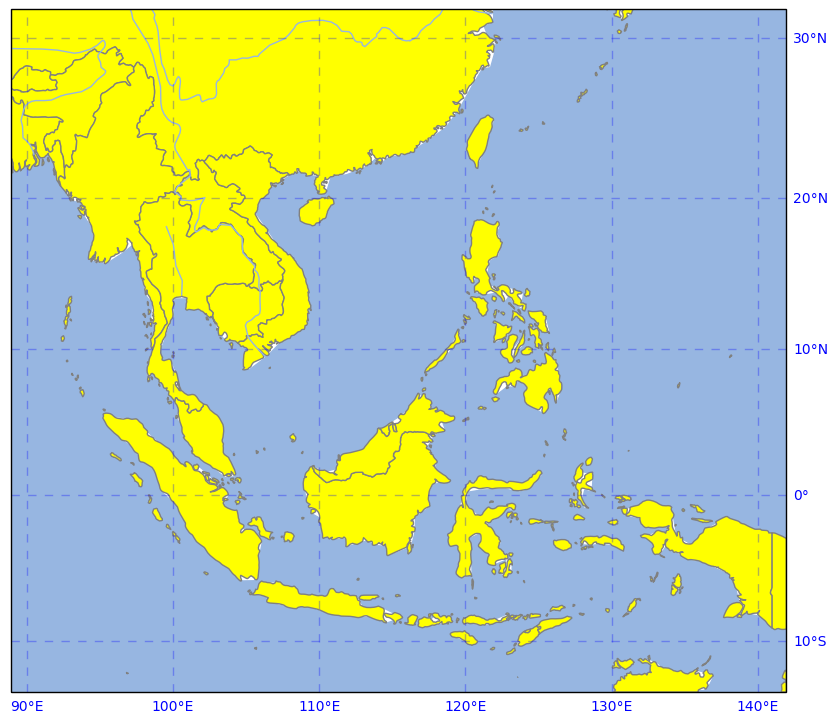

In [3]:
# This creates a plot of all ASEAN countries on Mercator projection with ...
# - oceans
# - coast lines
# - country boundaries (admin-0)
# - major rivers

# TODO: 
# - switches for layers ON/OFF
# - to set colors choices individually

import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

watercolor = cfeature.COLORS['water']

plt.figure(figsize=(10, 12))  # width x height in inches 

ax = plt.axes( projection=asean_mercator() )   # make use of the proj

# feature: physical/110m_ocean.shp
# type: polygon
ax.add_feature(cfeature.OCEAN, facecolor=watercolor)  

# feature: country shapes at medium scale
# type: polygon
admin0_50m = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '50m', 
                                          edgecolor='gray', facecolor='yellow')
ax.add_feature(admin0_50m)

# set True to plot rivers, set False to skip
major_rivers = True
if major_rivers:
    # 110m_rivers_lake_centerlines
    ax.add_feature(cfeature.RIVERS, edgecolor=watercolor, facecolor='none')
    
# ax.coastlines(resolution='110m', color='black')

# set True to plot roads, set False to skip
road_10m_f = False
if road_10m_f:
    roads_10m = cfeature.NaturalEarthFeature('cultural', 'roads', '10m', 
                                             edgecolor='red', facecolor='none')
    ax.add_feature(roads_10m)

# for visual inspection of map distortion
# set True to plot indicatrix, set False to skip 
plot_tissot = False
if plot_tissot:
    lats = range(-20,40,5)
    lons = range(80,150,5)
    ax.tissot(rad_km=150000.0, lons=lons, lats=lats, n_samples=40, facecolor='gray', alpha=0.25)

gl = ax.gridlines(draw_labels=True,
                  linewidth=1, color='blue', alpha=0.3, linestyle='--')

gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator([80,90,100,110,120,130,140,150])
gl.ylocator = mticker.FixedLocator([-20,-10,0,10,20,30,40])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'blue', 'weight': 'normal'}
gl.ylabel_style = {'size': 10, 'color': 'blue', 'weight': 'normal'}

plt.show()

---

About some warning messages:

When Tissot indicatrices are plotted, warning message says "some approx...". Nothing to worry, it is acceptable.

... \cartopy\mpl\geoaxes.py:586: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x00000000140C4FC0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))

